<a href="https://colab.research.google.com/github/Danie8904/Forecast-Demanda/blob/main/Modelamiento_Pronostico_con_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bienvenidos a 2do cuaderno (Notebook) en Jupyter - Python**

## Pronostico
## Mercadeo y Negociones Internacionales
### Practica: Modelamiento Pronostico en Python

Hoy vamos a "cacharrear" y aprender a como manejar la herramientar y entrar en contexto para hacer análisis de datos especialmente para hacer modelado predictivo (pronósticos) ⏰


# **Paso 1. Conectarse a Google Drive**

*   Carga toda la información conectenida en tu repositorio *DRIVE*

In [ ]:
# Lectura de archivos en el drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Paso 2. Importar Librerias**

In [ ]:
import pandas as pd # Es una biblioteca en Python ampliamente utilizada para el análisis y manipulación de datos. Facilita el trabajo con estructuras de datos como tablas y series temporales, proporcionando herramientas para cargar, limpiar, manipular y analizar datos de manera eficiente.
import numpy as np # Es una biblioteca fundamental para el cálculo numérico en Python. Proporciona soporte para arreglos (arrays) multidimensionales y herramientas para realizar operaciones matemáticas de alto rendimiento sobre estos datos.
import matplotlib.pyplot as plt # Es una biblioteca en Python utilizada para crear gráficos y visualizaciones de datos de manera fácil y flexible.


# **Paso 3. Cargar Datos**


1.   Excel
2.   CSV
3. TXT
4. Conexiones SQL
5. Entre otras

In [ ]:
# Lectura CSV
data_csv = pd.read_csv("/content/drive/MyDrive/Pronósticos 1 - 2025/Pronósticos Martes/BeerWineLiquor.csv")
data_excel = pd.read_excel("/content/drive/MyDrive/Pronósticos 1 - 2025/Pronósticos Martes/BeerWineLiquor.xlsx")

In [ ]:
data_csv.head(10)

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822
5,6/1/1992,1775
6,7/1/1992,1912
7,8/1/1992,1862
8,9/1/1992,1770
9,10/1/1992,1882


In [ ]:
data_csv.tail()

,date,beer
319,8/1/2018,4898
320,9/1/2018,4598
321,10/1/2018,4737
322,11/1/2018,5130
323,12/1/2018,6370


In [ ]:
data_excel.head()

,date,beer
0,2018-01-01,2995
1,2018-02-01,3202
2,2018-03-01,3550
3,2018-04-01,3409
4,2018-05-01,3786


In [ ]:
data_excel.tail()

,date,beer
77,2024-08-01,4898
78,2024-09-01,4598
79,2024-10-01,4737
80,2024-11-01,5130
81,2024-12-01,6370


# **Paso 3. Describir Datos**



*   Tamaño
*   Variable
* Formatos Variables
* Revisón Datos Faltantes
* Valores Unicos
* Otros

In [ ]:
data_excel.head(5)

,date,beer
0,2018-01-01,2995
1,2018-02-01,3202
2,2018-03-01,3550
3,2018-04-01,3409
4,2018-05-01,3786


In [ ]:
data_excel.tail(5)

,date,beer
77,2024-08-01,4898
78,2024-09-01,4598
79,2024-10-01,4737
80,2024-11-01,5130
81,2024-12-01,6370


In [ ]:
len(data_excel)

82

In [ ]:
data_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    82 non-null     datetime64[ns]
 1   beer    82 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 KB


In [ ]:
data_excel.describe()

,date,beer
count,82,82.000000
mean,2021-06-01 02:20:29.268292608,4216.731707
min,2018-01-01 00:00:00,2995.000000
25%,2019-09-08 12:00:00,3753.750000
50%,2021-05-16 12:00:00,4101.500000
75%,2023-02-22 00:00:00,4583.000000
max,2024-12-01 00:00:00,6370.000000
std,NaN,683.930327


In [ ]:
data_excel["beer"].describe()

,beer
count,82.000000
mean,4216.731707
std,683.930327
min,2995.000000
25%,3753.750000
50%,4101.500000
75%,4583.000000
max,6370.000000


## Paso 3.1 Convertir Formato Texto a Fecha



1.   **pd.to_datetime**: Es una función de Pandas que convierte una columna o serie de datos en un formato de fecha y hora (datetime).
2.   **dayfirst = True** Es un parámetro clave que le indica a Pandas que interprete el primer número en las fechas ambiguas como el día (útil para formatos como dd/mm/yyyy o dd-mm-yyyy).

In [ ]:
# Aseguremos que la varibale date tenga el formato fecha
data_excel['date'] = pd.to_datetime(data_excel['date'], dayfirst=True)

# Paso 3.2 Ajustar el Indice a la variable Fecha

* Un índice se refiere a una etiqueta que se usa para identificar y acceder a las filas de un DataFrame o una Serie
* Utilizar fechas como índice en un DataFrame de Pandas tiene varias ventajas, especialmente cuando se trabaja con series temporales o análisis de datos relacionados con el tiempo: Facilita el Acceso, Soporte para Operaciones de Series Temporales, Visualización de Datos, otros

In [ ]:
# Asegurándonos que 'date' sea el índice
data_excel.set_index('date', inplace=True)

In [ ]:
data_excel.head(5)

,beer
date,
2018-01-01,2995
2018-02-01,3202
2018-03-01,3550
2018-04-01,3409
2018-05-01,3786


#  Paso 3.3 Asignar frecuencia explícitamente




* data.asfreq = 'A'    # Frecuencia anual, final año
* data.asfreq = 'AS'   # Frecuencia anual, inicio de año
* data.asfreq  = 'Q'   # Frecuencia trimestral, final de trimestre
* data.asfreq  = 'QS'  # Frecuencia trimestral, inicio de trimestre
* data.asfreq = 'MS'   # Frecuencia mensual, inicio de mes
* data.asfreq = 'M'   # Frecuencia mensual, final de mes
* data.asfreq  = 'D'   # Frecuencia diaria

In [ ]:
# Si la frecuencia no está asignada explícitamente, la configuramos a 'MS' (inicio de mes)
data_excel = data_excel.asfreq('MS')

In [ ]:
data_excel.index

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
      

# **Paso 4. Gráficar Serie de Tiempo**

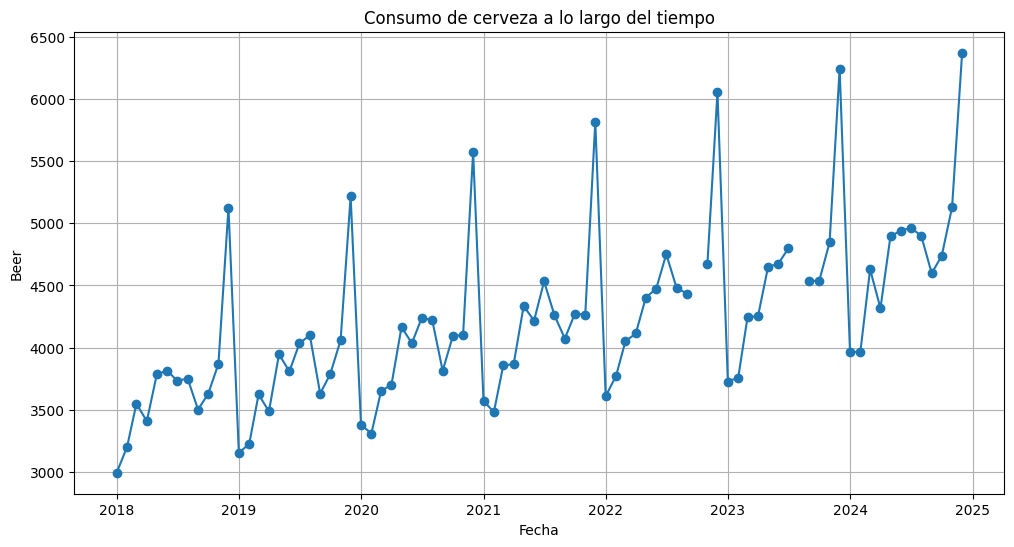

In [ ]:
import matplotlib.pyplot as plt # Es una biblioteca en Python utilizada para crear gráficos y visualizaciones de datos de manera fácil y flexible.

plt.figure(figsize=(12,6))
plt.plot(data_excel.index, data_excel['beer'], marker='o', linestyle='-')
plt.title('Consumo de cerveza a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Beer')
plt.grid(True)
plt.show()

# 4.1 Revisón de Datos Faltantes

Siempre debemos revisar que no existan datos perdidos o faltantes en la serie temporal, es requisito indespensable existan datos en cada periodo según la frecuencia de tiempo determinada (dia, mes, año, horas, semanas): Si existen datos faltantes existen varios métodos para rellenarlos:



1.   **Relleno frontal: "ffill"** , Ejemplo: data_excel.beer=data_excel.beer.fillna(method='ffill')
2.  **Relleno anterior: "bfill"**, Ejemplo: data_excel.beer=data_excel.beer.fillna(method='bfill')
3.   **Relleno media: "mean"** Ejemplo: data_excel.beer=data_excel.beer.fillna(value = data_excel.beer.mean())
4. **Relleno promedio movil: "rolling(window=3, min_periods=1).mean()"**
 * Calcula el promedio de los últimos 3 valores, teniendo en cuenta al menos 1 valor para calcular la media
 * Ejemplo: data_excel.beer= data_excel.beer.fillna(data_excel.beer.rolling(window=3, min_periods=1).mean())




In [ ]:
# Contemos cuanto periodos tienen datos faltantes
data_excel.isna().sum()

,0
beer,2


In [ ]:
data_excel.beer= data_excel.beer.fillna(data_excel.beer.rolling(window=3, min_periods=1).mean())

## 4.2 Gráficar Serie de Tiempo con datos completo

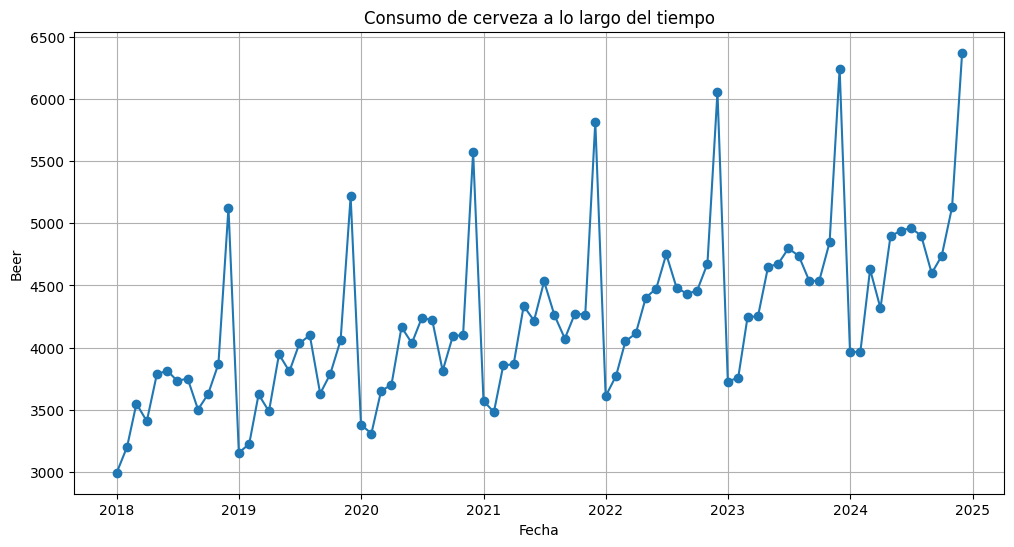

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data_excel.index, data_excel['beer'], marker='o', linestyle='-')
plt.title('Consumo de cerveza a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Beer')
plt.grid(True)
plt.show()

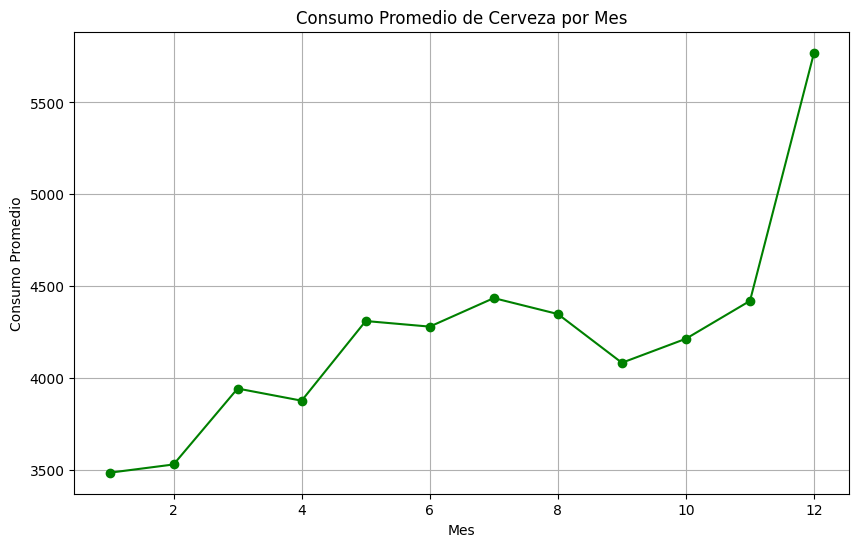

In [ ]:
# Gráfico Descriptivo

# Observemos y existe una fuerte estacionalidad, usando gráfico mensual para observar si hay patrones repetitivos.
data_excel['Mes'] = data_excel.index.month
promedio_mes = data_excel.groupby('Mes')['beer'].mean()

plt.figure(figsize=(10, 6))
plt.plot(promedio_mes, marker='o', color='green')
plt.title('Consumo Promedio de Cerveza por Mes')
plt.xlabel('Mes')
plt.ylabel('Consumo Promedio')
plt.grid(True)
plt.show()

# **Paso 5.Modelamiento de métodos de Pronóstico**

## **Paso 5.1 Métodos promedio moviles**

## **Método Promedio Movil 3**

In [ ]:
data_excel['Movil3'] = data_excel['beer'].rolling(window=3).mean()

In [ ]:
data_excel.head()

,beer,Mes,Movil3
date,,,
2018-01-01,2995.0,1,NaN
2018-02-01,3202.0,2,NaN
2018-03-01,3550.0,3,3249.000000
2018-04-01,3409.0,4,3387.000000
2018-05-01,3786.0,5,3581.666667


In [ ]:
data_excel.tail()

,beer,Mes,Movil3
date,,,
2024-08-01,4898.0,8,4933.333333
2024-09-01,4598.0,9,4819.666667
2024-10-01,4737.0,10,4744.333333
2024-11-01,5130.0,11,4821.666667
2024-12-01,6370.0,12,5412.333333


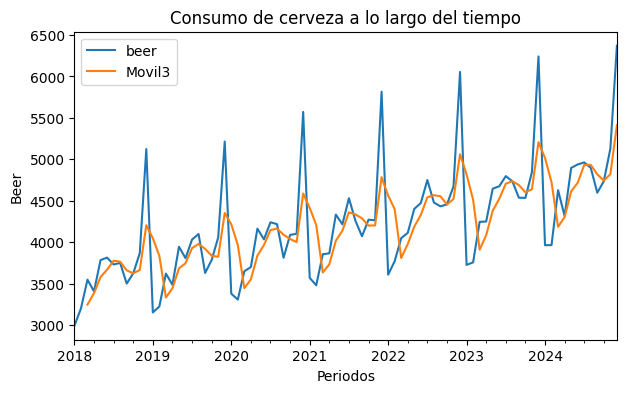

In [ ]:
#Graficar
data_excel.beer.plot(figsize=(7,4))
data_excel.Movil3.plot(figsize=(7,4))
plt.title("Consumo de cerveza a lo largo del tiempo")
plt.xlabel("Periodos")
plt.ylabel("Beer")
plt.legend()
plt.show();

In [ ]:
# Calculo de errores

from sklearn.metrics import mean_absolute_error, mean_squared_error
from IPython.display import display, Markdown

# Eliminar los primeros nulos
df_eval = data_excel.dropna(subset=['Movil3'])

# Variables reales y predichas
y_true = df_eval['beer']
y_pred = df_eval['Movil3']

# Cálculo de errores
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Crear tabla
tabla_errores = pd.DataFrame({
    'Error': ['MAE', 'MSE', 'RMSE', 'MAPE'],
    'Valor': [mae, mse, rmse, mape]
})

display(Markdown("### Tabla de los errores Promedio Movil 3"))
tabla_errores

### Tabla de los errores Promedio Movil 3

,Error,Valor
0,MAE,318.150407
1,MSE,206934.516260
2,RMSE,454.900556
3,MAPE,7.552894


## **Método Promedio Movil 6**

In [ ]:
data_excel['Movil6'] = data_excel['beer'].rolling(window=6).mean()

In [ ]:
data_excel.head(10)

,beer,Mes,Movil3,Movil6
date,,,,
2018-01-01,2995.0,1,NaN,NaN
2018-02-01,3202.0,2,NaN,NaN
2018-03-01,3550.0,3,3249.000000,NaN
2018-04-01,3409.0,4,3387.000000,NaN
2018-05-01,3786.0,5,3581.666667,NaN
2018-06-01,3816.0,6,3670.333333,3459.666667
2018-07-01,3733.0,7,3778.333333,3582.666667
2018-08-01,3752.0,8,3767.000000,3674.333333
2018-09-01,3503.0,9,3662.666667,3666.500000


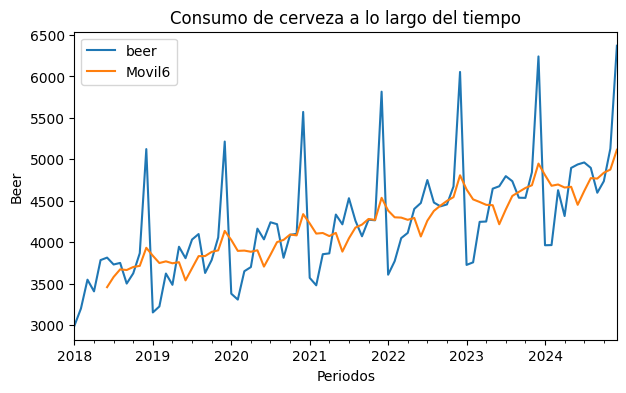

In [ ]:
#Graficar
data_excel.beer.plot(figsize=(7,4))
data_excel.Movil6.plot()
plt.title("Consumo de cerveza a lo largo del tiempo")
plt.xlabel("Periodos")
plt.ylabel("Beer")
plt.legend()
plt.show();

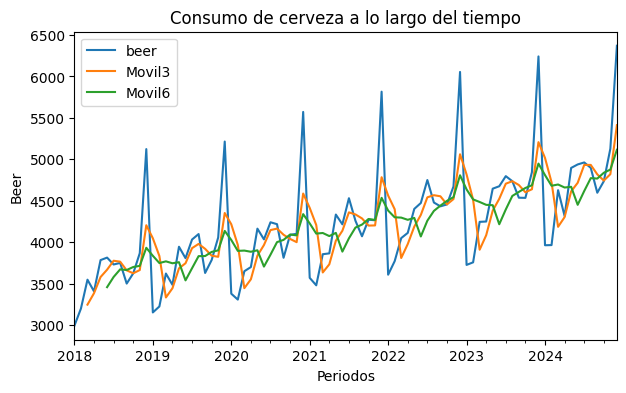

In [ ]:
#Graficar
data_excel.beer.plot(figsize=(7,4))
data_excel.Movil3.plot(figsize=(7,4))
data_excel.Movil6.plot(figsize=(7,4))
plt.title("Consumo de cerveza a lo largo del tiempo")
plt.xlabel("Periodos")
plt.ylabel("Beer")
plt.legend()
plt.show();

In [ ]:
# Calculo de errores

# Eliminar los primeros nulos
df_eval = data_excel.dropna(subset=['Movil6'])

# Variables reales y predichas
y_true = df_eval['beer']
y_pred = df_eval['Movil6']

# Cálculo de errores
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Crear tabla
tabla_errores = pd.DataFrame({
    'Error': ['MAE', 'MSE', 'RMSE', 'MAPE'],
    'Valor': [mae, mse, rmse, mape]
})

display(Markdown("### Tabla de los errores Promedio Movil 6"))
tabla_errores

### Tabla de los errores Promedio Movil 6

,Error,Valor
0,MAE,369.143460
1,MSE,251057.068214
2,RMSE,501.055953
3,MAPE,8.480704


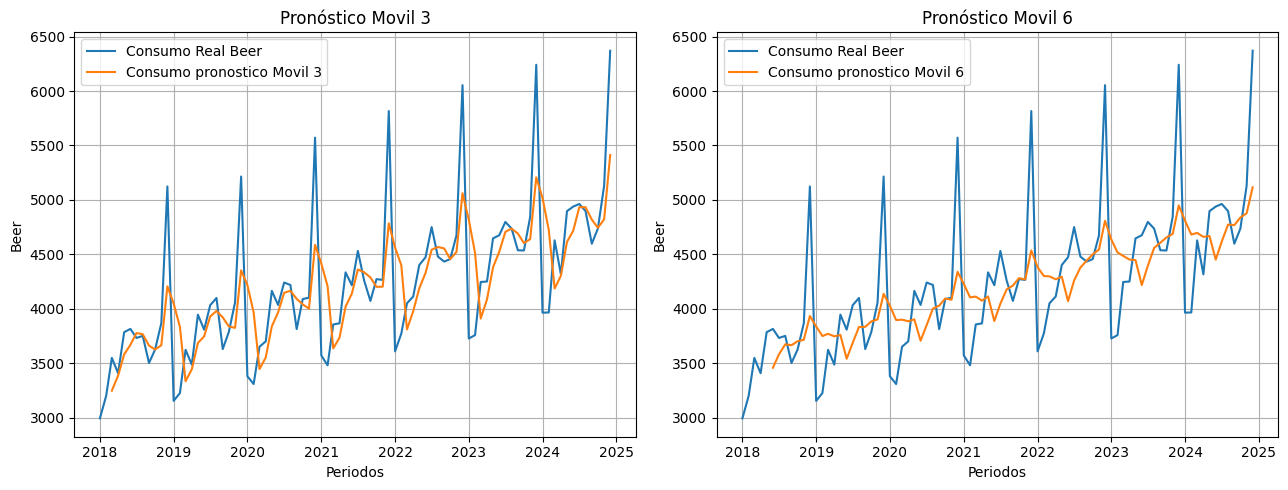

In [ ]:
# Gráficos subplot
plt.figure(figsize=(13, 5))

plt.subplot(1, 2, 1)
plt.plot(data_excel['beer'], label='Consumo Real Beer')
plt.plot(data_excel['Movil3'], label='Consumo pronostico Movil 3')
plt.title('Pronóstico Movil 3')
plt.xlabel("Periodos")
plt.ylabel("Beer")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(data_excel['beer'], label='Consumo Real Beer')
plt.plot(data_excel['Movil6'], label='Consumo pronostico Movil 6')
plt.title('Pronóstico Movil 6')
plt.xlabel("Periodos")
plt.ylabel("Beer")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
data_excel.head(10)

,beer,Mes,Movil3,Movil6
date,,,,
2018-01-01,2995.0,1,NaN,NaN
2018-02-01,3202.0,2,NaN,NaN
2018-03-01,3550.0,3,3249.000000,NaN
2018-04-01,3409.0,4,3387.000000,NaN
2018-05-01,3786.0,5,3581.666667,NaN
2018-06-01,3816.0,6,3670.333333,3459.666667
2018-07-01,3733.0,7,3778.333333,3582.666667
2018-08-01,3752.0,8,3767.000000,3674.333333
2018-09-01,3503.0,9,3662.666667,3666.500000


## **Paso 5.2 Métodos Suavizamiento Exponencial**

<div class="alert alert-info"><h3>Funciones:</h3>
<tt><strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html'>statsmodels.tsa.holtwinters.SimpleExpSmoothing</a></strong><font color=black></font>&nbsp;&nbsp;&nbsp;&nbsp;
Simple Exponential Smoothing<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html'>statsmodels.tsa.holtwinters.ExponentialSmoothing</a></strong><font color=black></font>&nbsp;&nbsp;
    Holt-Winters Exponential Smoothing</tt>

### Método Suavizamiento Exponencial Simple

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Ajustamos Valores método Suavizamiento Exponencial Simple
modelo_simple = SimpleExpSmoothing(data_excel['beer']).fit(optimized=True)
data_excel['Simple'] = modelo_simple.fittedvalues

In [ ]:
data_excel.head(10)

,beer,Mes,Movil3,Movil6,Simple
date,,,,,
2018-01-01,2995.0,1,NaN,NaN,2995.000000
2018-02-01,3202.0,2,NaN,NaN,2995.000000
2018-03-01,3550.0,3,3249.000000,NaN,3029.395698
2018-04-01,3409.0,4,3387.000000,NaN,3115.900761
2018-05-01,3786.0,5,3581.666667,NaN,3164.602949
2018-06-01,3816.0,6,3670.333333,3459.666667,3267.856017
2018-07-01,3733.0,7,3778.333333,3582.666667,3358.937151
2018-08-01,3752.0,8,3767.000000,3674.333333,3421.092478
2018-09-01,3503.0,9,3662.666667,3666.500000,3476.076995


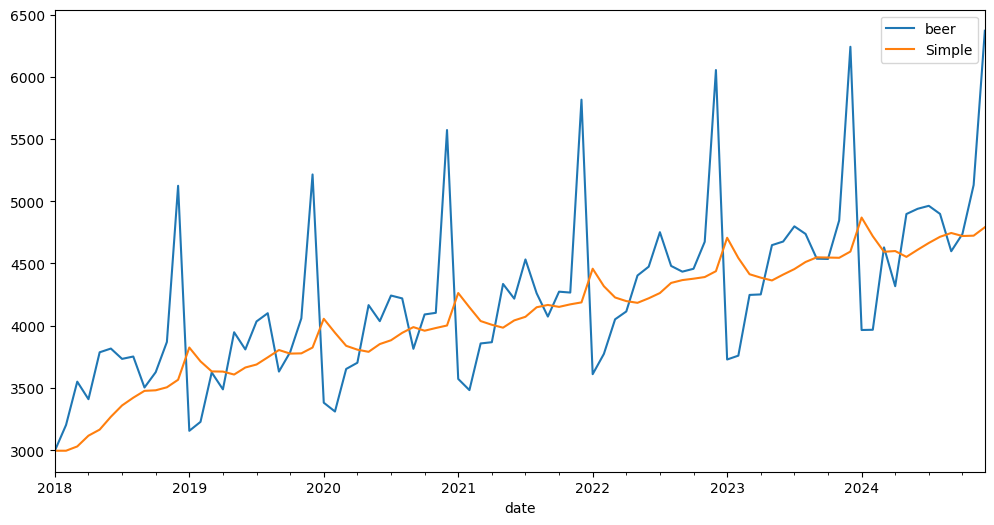

In [ ]:
# Graficar dos columnas
data_excel[['beer','Simple']].plot(figsize=(12,6));

In [ ]:
# Encontramos el parámetro alpha
modelo_simple.params_formatted

,name,param,optimized
smoothing_level,alpha,0.166163,True
initial_level,l.0,2995.000000,False


In [ ]:
# Calculo de errores

# Eliminar los primeros nulos
df_eval = data_excel.dropna(subset=['Simple'])

# Variables reales y predichas
y_true = df_eval['beer']
y_pred = df_eval['Simple']

# Cálculo de errores
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Crear tabla
tabla_errores = pd.DataFrame({
    'Error': ['MAE', 'MSE', 'RMSE', 'MAPE'],
    'Valor': [mae, mse, rmse, mape]
})

display(Markdown("### Tabla de los errore Suavizamiento Simple"))
tabla_errores

### Tabla de los errore Suavizamiento Simple

,Error,Valor
0,MAE,405.624097
1,MSE,336384.359464
2,RMSE,579.986517
3,MAPE,9.269989


In [ ]:
# Pronósticamos 12 periodos
pronostico_simple=modelo_simple.forecast(12)

expo_simple=pd.concat([data_excel["Simple"],pronostico_simple])
expo_simple = expo_simple.to_frame(name='Pronóstico_Simple')

In [ ]:
expo_simple.tail()

,Pronóstico_Simple
2025-08-01,5053.119294
2025-09-01,5053.119294
2025-10-01,5053.119294
2025-11-01,5053.119294
2025-12-01,5053.119294


In [ ]:
expo_simple.head()

,Pronóstico_Simple
2018-01-01,2995.000000
2018-02-01,2995.000000
2018-03-01,3029.395698
2018-04-01,3115.900761
2018-05-01,3164.602949


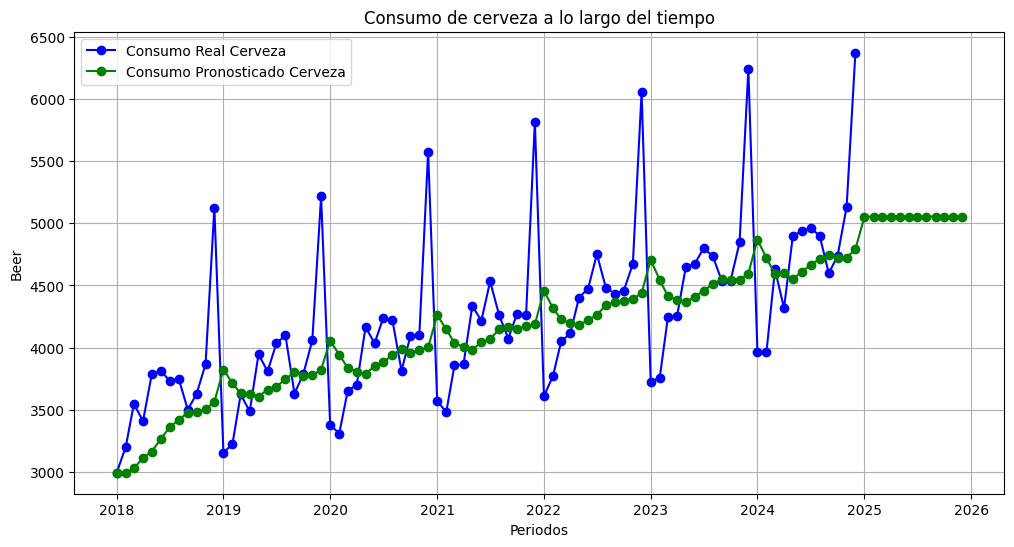

In [ ]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(12,6))

plt.plot(data_excel.index, data_excel["beer"], '-o', color="blue", label="Consumo Real Cerveza")
plt.plot(expo_simple, '-o', color="green", label="Consumo Pronosticado Cerveza")
plt.title("Consumo de cerveza a lo largo del tiempo")
plt.xlabel("Periodos")
plt.ylabel("Beer")
plt.legend()
plt.grid()
plt.show()

### Método Suavizamiento Exponencial Doble - Holt

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Ajustamos Valores método Suavizamiento Exponencial Doble
modelo_holt = ExponentialSmoothing(data_excel['beer'], trend='add', seasonal=None).fit(optimized=True)
data_excel['Holt'] = modelo_holt.fittedvalues

In [ ]:
data_excel.head()

,beer,Mes,Movil3,Movil6,Simple,Holt
date,,,,,,
2018-01-01,2995.0,1,NaN,NaN,2995.000000,3238.026499
2018-02-01,3202.0,2,NaN,NaN,2995.000000,3236.397837
2018-03-01,3550.0,3,3249.000000,NaN,3029.395698,3255.124242
2018-04-01,3409.0,4,3387.000000,NaN,3115.900761,3309.408189
2018-05-01,3786.0,5,3581.666667,NaN,3164.602949,3345.301419


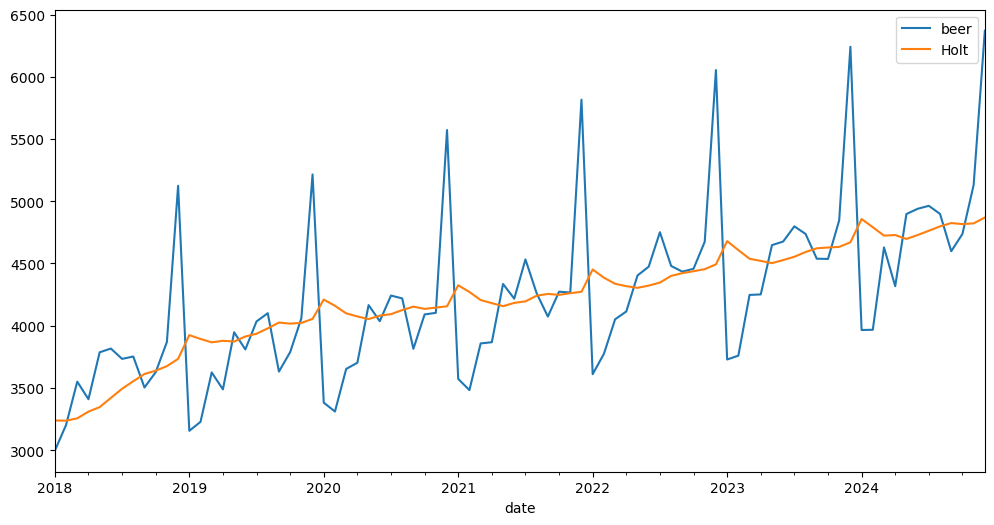

In [ ]:
# Graficar dos columnas
data_excel[['beer','Holt']].plot(figsize=(12,6));

In [ ]:
# Encontramos el parámetro alfha y beta
modelo_holt.params_formatted

,name,param,optimized
smoothing_level,alpha,0.099186,True
smoothing_trend,beta,0.099087,True
initial_level,l.0,3213.161740,True
initial_trend,b.0,24.864760,True


In [ ]:
# Calculo de errores

# Eliminar los primeros nulos
df_eval = data_excel.dropna(subset=['Holt'])

# Variables reales y predichas
y_true = df_eval['beer']
y_pred = df_eval['Holt']

# Cálculo de errores
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Crear tabla
tabla_errores = pd.DataFrame({
    'Error': ['MAE', 'MSE', 'RMSE', 'MAPE'],
    'Valor': [mae, mse, rmse, mape]
})

display(Markdown("### Tabla de los errore Suavizamiento Holt"))
tabla_errores

### Tabla de los errore Suavizamiento Holt

,Error,Valor
0,MAE,378.042929
1,MSE,307728.668546
2,RMSE,554.732970
3,MAPE,8.809532


In [ ]:
# Pronósticamos 12 periodos
pronostico_holt=modelo_holt.forecast(12)

expo_holt=pd.concat([data_excel["Holt"],pronostico_holt])
expo_holt = expo_holt.to_frame(name='Pronóstico_Holt')

In [ ]:
expo_holt.tail()

,Pronóstico_Holt
2025-08-01,5267.956014
2025-09-01,5299.230927
2025-10-01,5330.505839
2025-11-01,5361.780752
2025-12-01,5393.055664


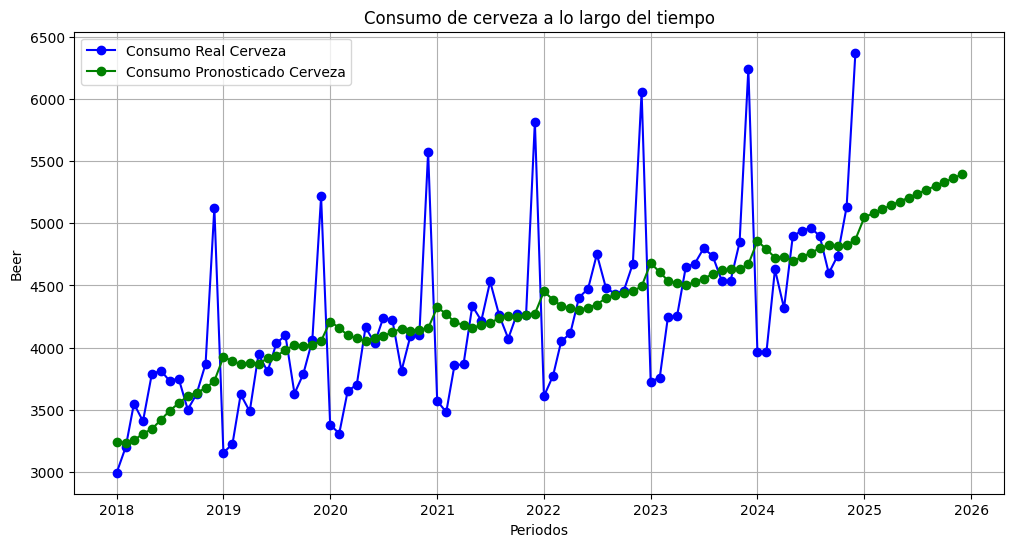

In [ ]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(12,6))

plt.plot(data_excel.index, data_excel["beer"], '-o', color="blue", label="Consumo Real Cerveza")
plt.plot(expo_holt, '-o', color="green", label="Consumo Pronosticado Cerveza")
plt.title("Consumo de cerveza a lo largo del tiempo")
plt.xlabel("Periodos")
plt.ylabel("Beer")
plt.legend()
plt.grid()
plt.show()

### Método Suavizamiento Exponencial Triple - Winter


Cuando utilizamos el modelo Holt-Winters para suavizamiento exponencial, los parámetros trend='add' y trend='mul' se refieren a cómo se trata la tendencia en los datos:

* **trend='add' (Aditiva):**

Se utiliza cuando la tendencia es lineal, la tendencia es una constante que se agrega a cada punto en el tiempo. Si los datos aumentan o disminuyen a una tasa constante, este modelo es adecuado.

Formula:
𝑌𝑡=𝐿𝑡+𝑇𝑡+𝑆𝑡

Donde:

𝐿𝑡 = es el nivel (media),

𝑇𝑡 =  es la tendencia (cambio constante),

𝑆𝑡 = es la estacionalidad.

* **trend='mul' (Multiplicativa):**

Se utiliza cuando la tendencia tiene un crecimiento o decrecimiento proporcional o exponencial.La tendencia se multiplica por cada valor, lo que significa que el cambio en los datos es proporcional al valor anterior. Es útil si tus datos tienen una creciente o decreciente exponencial a lo largo del tiempo.

Formula:
𝑌𝑡 = 𝐿𝑡×𝑇𝑡×𝑆𝑡


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Ajustamos Valores método Suavizamiento Exponencial Doble
modelo_winter = ExponentialSmoothing(data_excel['beer'],trend='add',seasonal='add',seasonal_periods=12).fit(optimized=True)
data_excel['Winter'] = modelo_winter.fittedvalues

In [ ]:
data_excel.head()

,beer,Mes,Movil3,Movil6,Simple,Holt,Winter
date,,,,,,,
2018-01-01,2995.0,1,NaN,NaN,2995.000000,3238.026499,3045.736058
2018-02-01,3202.0,2,NaN,NaN,2995.000000,3236.397837,3068.189706
2018-03-01,3550.0,3,3249.000000,NaN,3029.395698,3255.124242,3449.401621
2018-04-01,3409.0,4,3387.000000,NaN,3115.900761,3309.408189,3433.188475
2018-05-01,3786.0,5,3581.666667,NaN,3164.602949,3345.301419,3850.229695


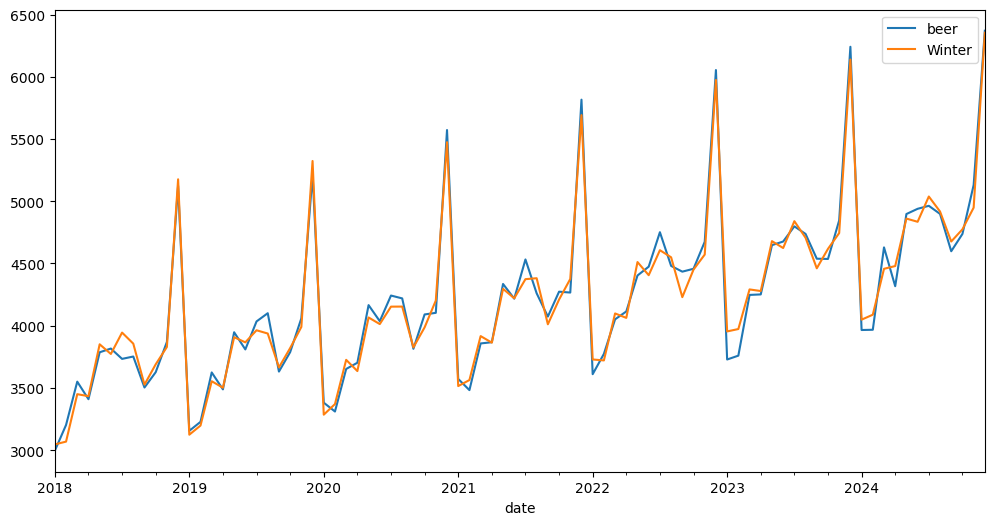

In [ ]:
# Graficar dos columnas
data_excel[['beer','Winter']].plot(figsize=(12,6));

In [ ]:
# Encontramos el parámetro alfha y beta y gamma
modelo_winter.params_formatted

,name,param,optimized
smoothing_level,alpha,0.137022,True
smoothing_trend,beta,0.079190,True
smoothing_seasonal,gamma,0.227007,True
initial_level,l.0,3651.586190,True
initial_trend,b.0,11.128681,True
initial_seasons.0,s.0,-616.978813,True
initial_seasons.1,s.1,-598.151358,True
initial_seasons.2,s.2,-247.304517,True
initial_seasons.3,s.3,-290.423539,True
initial_seasons.4,s.4,117.072831,True


In [ ]:
# Calculo de errores

# Eliminar los primeros nulos
df_eval = data_excel.dropna(subset=['Winter'])

# Variables reales y predichas
y_true = df_eval['beer']
y_pred = df_eval['Winter']

# Cálculo de errores
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Crear tabla
tabla_errores = pd.DataFrame({
    'Error': ['MAE', 'MSE', 'RMSE', 'MAPE'],
    'Valor': [mae, mse, rmse, mape]
})

display(Markdown("### Tabla de los errore Suavizamiento Winter"))
tabla_errores

### Tabla de los errore Suavizamiento Winter

,Error,Valor
0,MAE,78.189798
1,MSE,8660.888851
2,RMSE,93.063897
3,MAPE,1.874197


In [ ]:
# Pronósticamos 12 periodos
pronostico_winter=modelo_winter.forecast(12)

expo_winter=pd.concat([data_excel["Winter"],pronostico_winter])
expo_winter = expo_winter.to_frame(name='Pronóstico_Winter')

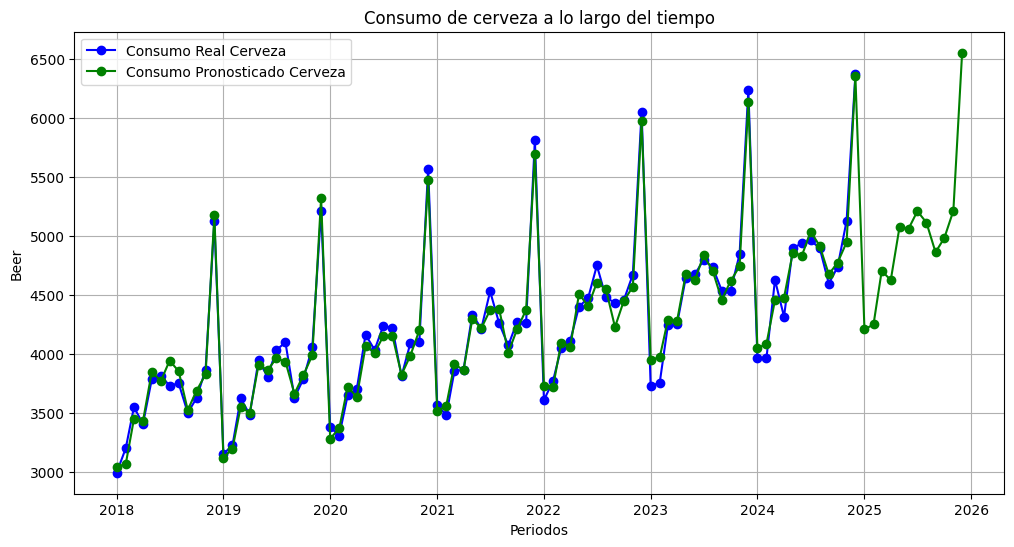

In [ ]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(12,6))

plt.plot(data_excel.index, data_excel["beer"], '-o', color="blue", label="Consumo Real Cerveza")
plt.plot(expo_winter, '-o', color="green", label="Consumo Pronosticado Cerveza")
plt.title("Consumo de cerveza a lo largo del tiempo")
plt.xlabel("Periodos")
plt.ylabel("Beer")
plt.legend()
plt.grid()
plt.show()

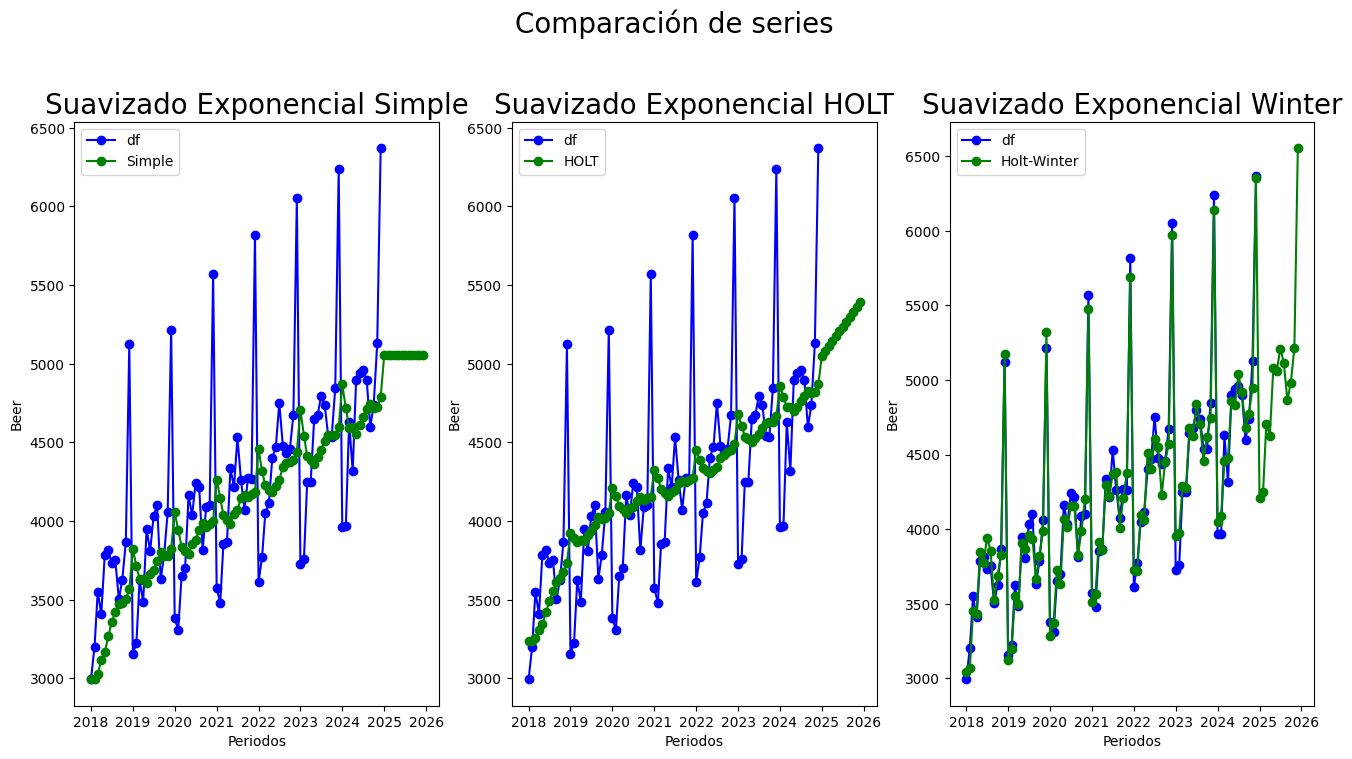

In [ ]:
fig, (ax1, ax2, ax3)= plt.subplots(1, 3, figsize=(16,8))
fig.suptitle("Comparación de series", fontsize=20)

ax1.plot(data_excel.index, data_excel["beer"], '-o', color="blue", label="df")
ax1.plot(expo_simple, '-o', color="green", label="Simple")
ax1.set_title("Suavizado Exponencial Simple",fontsize=20)
ax1.set(xlabel="Periodos", ylabel="Beer")
ax1.legend(loc="best")


ax2.plot(data_excel.index, data_excel["beer"], '-o', color="blue", label="df")
ax2.plot(expo_holt, '-o', color="green", label="HOLT")
ax2.set_title("Suavizado Exponencial HOLT",fontsize=20)
ax2.set(xlabel="Periodos", ylabel="Beer")
ax2.legend(loc="best")

ax3.plot(data_excel.index, data_excel["beer"], '-o', color="blue", label="df")
ax3.plot(expo_winter, '-o', color="green", label="Holt-Winter")
ax3.set_title("Suavizado Exponencial Winter",fontsize=20)
ax3.set(xlabel="Periodos", ylabel="Beer")
ax3.legend(loc="best")


plt.subplots_adjust(top=0.84)
plt.show()

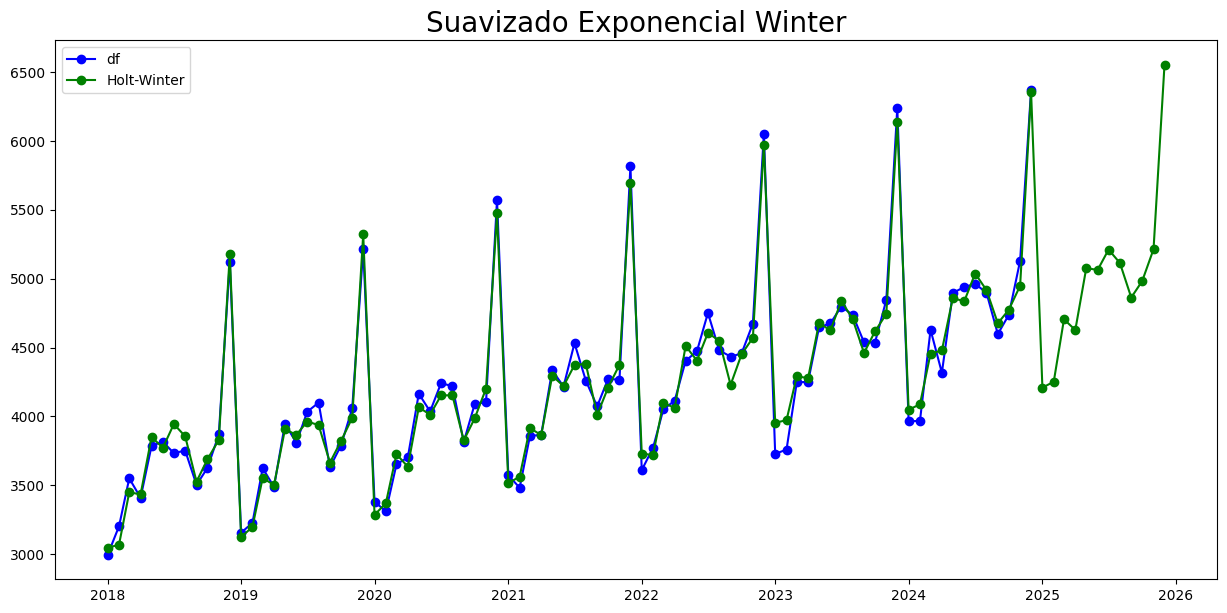

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(data_excel.index, data_excel["beer"], '-o', color="blue", label="df")
plt.plot(expo_winter, '-o', color="green", label="Holt-Winter")

plt.title("Suavizado Exponencial Winter",fontsize=20)
plt.xlabel="Periodos",
plt.ylabel="Consumo Beer"
plt.legend(loc="best")
plt.show()

# Paso 6.Modelamiento Avanzado Series de Tiempo





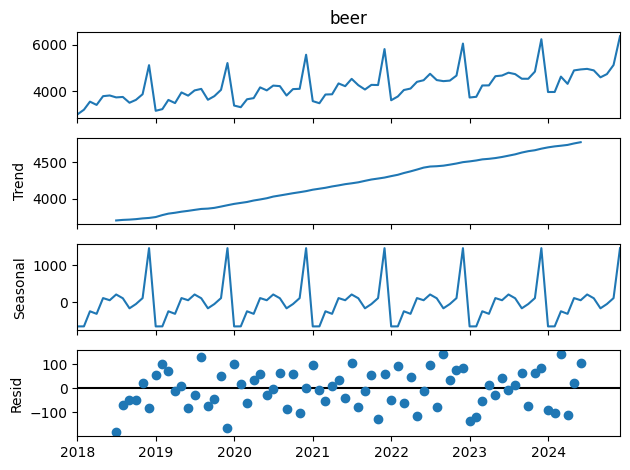

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data_excel["beer"], model='additive', period=12)

# Graficar los componentes
result.plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

resultado_adf = adfuller(data_excel["beer"])

print("Prueba Dickey-Fuller Aumentada (ADF):")
print(f"Estadístico de Prueba: {resultado_adf[0]:.4f}")
print(f"P-valor: {resultado_adf[1]:.4f}")
#print(f"Valores Críticos: {resultado_adf[4]}")
if resultado_adf[1] < 0.05:
    print("✅ La serie es estacionaria (se rechaza la hipótesis nula).")
else:
    print("❌ La serie NO es estacionaria (no se rechaza la hipótesis nula).")

Prueba Dickey-Fuller Aumentada (ADF):
Estadístico de Prueba: 0.8722
P-valor: 0.9927
❌ La serie NO es estacionaria (no se rechaza la hipótesis nula).


In [ ]:
data_excel["Diferenciada"] = data_excel["beer"].diff().dropna()

In [ ]:
data_excel.head()

,beer,Mes,Movil3,Movil6,Simple,Holt,Winter,Diferenciada
date,,,,,,,,
2018-01-01,2995.0,1,NaN,NaN,2995.000000,3238.026499,3045.736058,NaN
2018-02-01,3202.0,2,NaN,NaN,2995.000000,3236.397837,3068.189706,207.0
2018-03-01,3550.0,3,3249.000000,NaN,3029.395698,3255.124242,3449.401621,348.0
2018-04-01,3409.0,4,3387.000000,NaN,3115.900761,3309.408189,3433.188475,-141.0
2018-05-01,3786.0,5,3581.666667,NaN,3164.602949,3345.301419,3850.229695,377.0


In [ ]:
from statsmodels.tsa.stattools import adfuller

resultado_adf = adfuller(data_excel["Diferenciada"].dropna())

print("Prueba Dickey-Fuller Aumentada (ADF):")
print(f"Estadístico de Prueba: {resultado_adf[0]:.4f}")
print(f"P-valor: {resultado_adf[1]:.4f}")
#print(f"Valores Críticos: {resultado_adf[4]}")
if resultado_adf[1] < 0.05:
    print("✅ La serie es estacionaria (se rechaza la hipótesis nula).")
else:
    print("❌ La serie NO es estacionaria (no se rechaza la hipótesis nula).")

Prueba Dickey-Fuller Aumentada (ADF):
Estadístico de Prueba: -39.9886
P-valor: 0.0000
✅ La serie es estacionaria (se rechaza la hipótesis nula).


In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

resultado_ljung = acorr_ljungbox(data_excel["Diferenciada"].dropna(), lags=[10], return_df=True)

print("Prueba de Ljung-Box:")
print(resultado_ljung)

if resultado_ljung['lb_pvalue'].values[0] < 0.05:
    print("✅ Hay evidencia de autocorrelación en la serie (se rechaza la independencia).")
else:
    print("❌ No hay evidencia de autocorrelación significativa.")

Prueba de Ljung-Box:
     lb_stat  lb_pvalue
10  22.95686   0.010907
✅ Hay evidencia de autocorrelación en la serie (se rechaza la independencia).


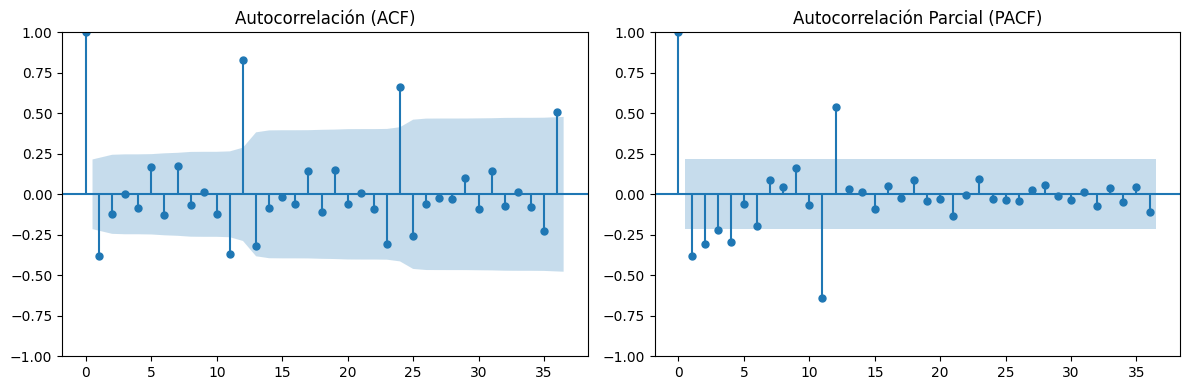

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Gráfico de autocorrelación (ACF)
plot_acf(data_excel["Diferenciada"].dropna(), ax=axes[0], lags=36)
axes[0].set_title("Autocorrelación (ACF)")

# Gráfico de autocorrelación parcial (PACF)
plot_pacf(data_excel["Diferenciada"].dropna(), ax=axes[1], lags=36)
axes[1].set_title("Autocorrelación Parcial (PACF)")

plt.tight_layout()
plt.show()

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.5 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm
from pmdarima import auto_arima

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

# Paso 7. Modelo Prophet

## Paso 7.1 Formato de los datos (Requisito del Modelo)



*   Este modelo está configurado para leer a 'ds' como la variable fecha  y 'y' para la variable a pronosticar




In [ ]:
data_excel = data_excel.reset_index()  # Convierte el índice en columna llamada 'date'

In [ ]:
data_excel

,date,beer,Mes,Movil3,Movil6,Simple,Holt,Winter,Diferenciada
0,2018-01-01,2995.0,1,NaN,NaN,2995.000000,3238.026499,3045.736058,NaN
1,2018-02-01,3202.0,2,NaN,NaN,2995.000000,3236.397837,3068.189706,207.0
2,2018-03-01,3550.0,3,3249.000000,NaN,3029.395698,3255.124242,3449.401621,348.0
3,2018-04-01,3409.0,4,3387.000000,NaN,3115.900761,3309.408189,3433.188475,-141.0
4,2018-05-01,3786.0,5,3581.666667,NaN,3164.602949,3345.301419,3850.229695,377.0
...,...,...,...,...,...,...,...,...,...
79,2024-08-01,4898.0,8,4933.333333,4773.833333,4714.131975,4797.878145,4917.347072,-65.0
80,2024-09-01,4598.0,9,4819.666667,4768.666667,4744.683999,4824.302947,4676.187575,-300.0
81,2024-10-01,4737.0,10,4744.333333,4838.666667,4720.310577,4816.126707,4774.151376,139.0
82,2024-11-01,5130.0,11,4821.666667,4877.500000,4723.083738,4821.770688,4948.143300,393.0


In [ ]:
# Renombrar a 'ds' y 'y'
data_excel = data_excel.rename(columns={'date': 'ds', 'beer': 'y'})

In [ ]:
data_excel

,ds,y,Mes,Movil3,Movil6,Simple,Holt,Winter,Diferenciada
0,2018-01-01,2995.0,1,NaN,NaN,2995.000000,3238.026499,3045.736058,NaN
1,2018-02-01,3202.0,2,NaN,NaN,2995.000000,3236.397837,3068.189706,207.0
2,2018-03-01,3550.0,3,3249.000000,NaN,3029.395698,3255.124242,3449.401621,348.0
3,2018-04-01,3409.0,4,3387.000000,NaN,3115.900761,3309.408189,3433.188475,-141.0
4,2018-05-01,3786.0,5,3581.666667,NaN,3164.602949,3345.301419,3850.229695,377.0
...,...,...,...,...,...,...,...,...,...
79,2024-08-01,4898.0,8,4933.333333,4773.833333,4714.131975,4797.878145,4917.347072,-65.0
80,2024-09-01,4598.0,9,4819.666667,4768.666667,4744.683999,4824.302947,4676.187575,-300.0
81,2024-10-01,4737.0,10,4744.333333,4838.666667,4720.310577,4816.126707,4774.151376,139.0
82,2024-11-01,5130.0,11,4821.666667,4877.500000,4723.083738,4821.770688,4948.143300,393.0


In [ ]:
# convertir fecha en formato tiempo
data_excel['ds'] = pd.to_datetime(data_excel['ds'])

In [ ]:
data_excel.head()

,ds,y,Mes,Movil3,Movil6,Simple,Holt,Winter,Diferenciada
0,2018-01-01,2995.0,1,NaN,NaN,2995.000000,3238.026499,3045.736058,NaN
1,2018-02-01,3202.0,2,NaN,NaN,2995.000000,3236.397837,3068.189706,207.0
2,2018-03-01,3550.0,3,3249.000000,NaN,3029.395698,3255.124242,3449.401621,348.0
3,2018-04-01,3409.0,4,3387.000000,NaN,3115.900761,3309.408189,3433.188475,-141.0
4,2018-05-01,3786.0,5,3581.666667,NaN,3164.602949,3345.301419,3850.229695,377.0


## Paso 7.2 Creación y ajuste del modelo

In [ ]:
from prophet import Prophet
m = Prophet()  # ajusta el modelo automaticamente
m.add_country_holidays(country_name='CO')  # 'CO' = Código ISO de Colombia
m.fit(data_excel)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoo1ppt1s/rstvnlfn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoo1ppt1s/aqju7e4m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75489', 'data', 'file=/tmp/tmpoo1ppt1s/rstvnlfn.json', 'init=/tmp/tmpoo1ppt1s/aqju7e4m.json', 'output', 'file=/tmp/tmpoo1ppt1s/prophet_modelkylf5zhv/prophet_model-20250513192711.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:27:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:27:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# En caso que queramos ajustar mejor el modelo
#m = Prophet(
#    yearly_seasonality=True,  # Estacionalidad anual (útil para patrones como "más demanda en diciembre")
#    weekly_seasonality=False, # Desactivar (no aplica para datos mensuales)
#    daily_seasonality=False, # Desactivar (no aplica)
#    seasonality_mode='additive'  # 'additive' o 'multiplicative' (si el efecto estacional crece con la tendencia)
#)

In [ ]:
# Ver festivos incluidos:
print(m.train_holiday_names)

0                                  New Year's Day
1                             Epiphany (observed)
2                              Saint Joseph's Day
3                                 Maundy Thursday
4                                     Good Friday
5                        Ascension Day (observed)
6                       Corpus Christi (observed)
7                                       Labor Day
8                         Sacred Heart (observed)
9     Saint Peter and Saint Paul's Day (observed)
10                               Independence Day
11                               Battle of Boyacá
12                      Assumption Day (observed)
13                        Columbus Day (observed)
14                     All Saints' Day (observed)
15           Independence of Cartagena (observed)
16                          Immaculate Conception
17                                  Christmas Day
18                  Saint Joseph's Day (observed)
19                      Independence of Cartagena


## Paso 7.3 Pronósticos del futuro

### Paso 7.3.1 : Crear una tabla donde colocaremos los resultados (futuro)

In [ ]:
# future = model.make_future_dataframe(periods=30, freq='D')  # Predice 30 días
# future = model.make_future_dataframe(periods=8, freq='W')  # Predice 8 semanas
future = m.make_future_dataframe(periods=24,freq = 'MS') # Predice mensualmente

In [ ]:
future.head()

,ds
0,2018-01-01
1,2018-02-01
2,2018-03-01
3,2018-04-01
4,2018-05-01


In [ ]:
data_excel.head()

,ds,y,Mes,Movil3,Movil6,Simple,Holt,Winter,Diferenciada
0,2018-01-01,2995.0,1,NaN,NaN,2995.000000,3238.026499,3045.736058,NaN
1,2018-02-01,3202.0,2,NaN,NaN,2995.000000,3236.397837,3068.189706,207.0
2,2018-03-01,3550.0,3,3249.000000,NaN,3029.395698,3255.124242,3449.401621,348.0
3,2018-04-01,3409.0,4,3387.000000,NaN,3115.900761,3309.408189,3433.188475,-141.0
4,2018-05-01,3786.0,5,3581.666667,NaN,3164.602949,3345.301419,3850.229695,377.0


In [ ]:
data_excel.tail()

,ds,y,Mes,Movil3,Movil6,Simple,Holt,Winter,Diferenciada
79,2024-08-01,4898.0,8,4933.333333,4773.833333,4714.131975,4797.878145,4917.347072,-65.0
80,2024-09-01,4598.0,9,4819.666667,4768.666667,4744.683999,4824.302947,4676.187575,-300.0
81,2024-10-01,4737.0,10,4744.333333,4838.666667,4720.310577,4816.126707,4774.151376,139.0
82,2024-11-01,5130.0,11,4821.666667,4877.500000,4723.083738,4821.770688,4948.143300,393.0
83,2024-12-01,6370.0,12,5412.333333,5116.000000,4790.698079,4868.864440,6353.773380,1240.0


In [ ]:
future.tail()

,ds
103,2026-08-01
104,2026-09-01
105,2026-10-01
106,2026-11-01
107,2026-12-01


### Paso 7.3.2 : Calcular los pronósticos y guardarlos en forecast

In [ ]:
# Hacemos la predicción
forecast = m.predict(future)

In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3653.691860,2905.293077,3094.182987,3653.691860,3653.691860,-657.022694,-657.022694,-657.022694,-657.022694,-657.022694,-657.022694,0.0,0.0,0.0,2996.669166
1,2018-02-01,3663.114603,2951.988546,3142.126069,3663.114603,3663.114603,-614.530342,-614.530342,-614.530342,-614.530342,-614.530342,-614.530342,0.0,0.0,0.0,3048.584261
2,2018-03-01,3671.625468,3352.049860,3545.204489,3671.625468,3671.625468,-223.306605,-223.306605,-223.306605,-223.306605,-223.306605,-223.306605,0.0,0.0,0.0,3448.318863
3,2018-04-01,3681.048211,3291.885449,3485.693583,3681.048211,3681.048211,-297.687087,-297.687087,-297.687087,-297.687087,-297.687087,-297.687087,0.0,0.0,0.0,3383.361124
4,2018-05-01,3690.166994,3696.801767,3893.196873,3690.166994,3690.166994,101.516297,101.516297,101.516297,101.516297,101.516297,101.516297,0.0,0.0,0.0,3791.683291


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
96,2026-01-01,4436.476360,4342.345890,4532.296733
97,2026-02-01,4495.419777,4397.303511,4598.034694
98,2026-03-01,4901.502541,4799.090290,5002.195249
99,2026-04-01,4843.573125,4751.068624,4942.905582
100,2026-05-01,5258.696895,5161.677845,5352.513602
101,2026-06-01,5231.437447,5136.231935,5328.609483
102,2026-07-01,5387.965260,5285.907983,5484.088931
103,2026-08-01,5310.974069,5209.239029,5412.282942
104,2026-09-01,5054.449754,4952.277713,5149.516014
105,2026-10-01,5166.649486,5073.968033,5266.502649


### Paso 7.3.3 Graficando los pronósticos

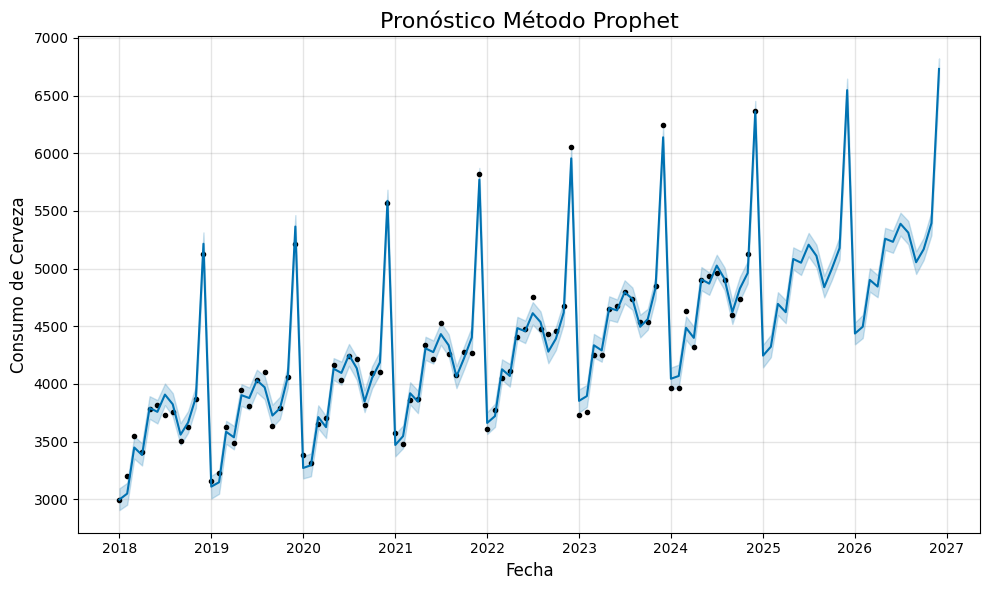

In [ ]:
# Generar el gráfico base con Prophet (usa Matplotlib)
fig = m.plot(forecast)

# Acceder al eje principal del gráfico
ax = fig.gca()

# Agregar título y etiquetas a los ejes
ax.set_title("Pronóstico Método Prophet", fontsize=16)
ax.set_xlabel("Fecha", fontsize=12)
ax.set_ylabel("Consumo de Cerveza", fontsize=12)

# Mostrar el gráfico
plt.tight_layout()

In [ ]:
pd.plotting.register_matplotlib_converters()

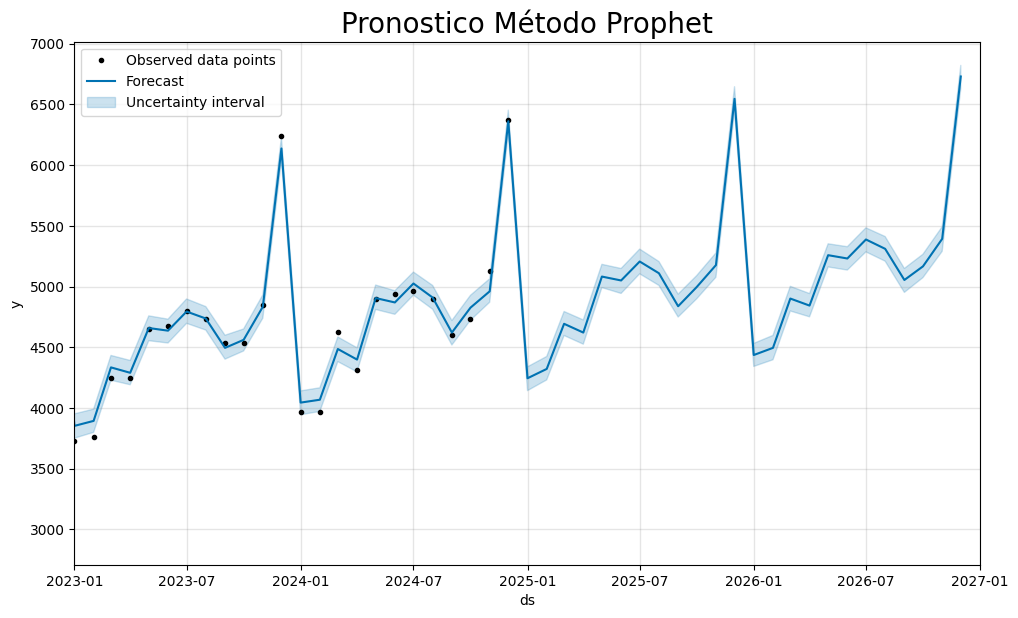

In [ ]:
import matplotlib.pyplot as plt
m.plot(forecast)
plt.xlim('2023-01-01','2027-01-01')

plt.title("Pronostico Método Prophet",fontsize=20)
plt.xlabel=("Periodos"),
plt.ylabel=("Consumo Cerveza"),
plt.legend(loc="best"),
plt.show()

In [ ]:
from prophet.plot import plot_plotly
import plotly.graph_objects as go

fig = plot_plotly(m, forecast)

fig.update_layout(
    title='Pronóstico de Ventas con Prophet',
    xaxis_title='Fecha',
    yaxis_title='Consumo Beer',
    template='plotly_white'
)
fig.show()

### Paso 7.3.4 Analisis de las componentes

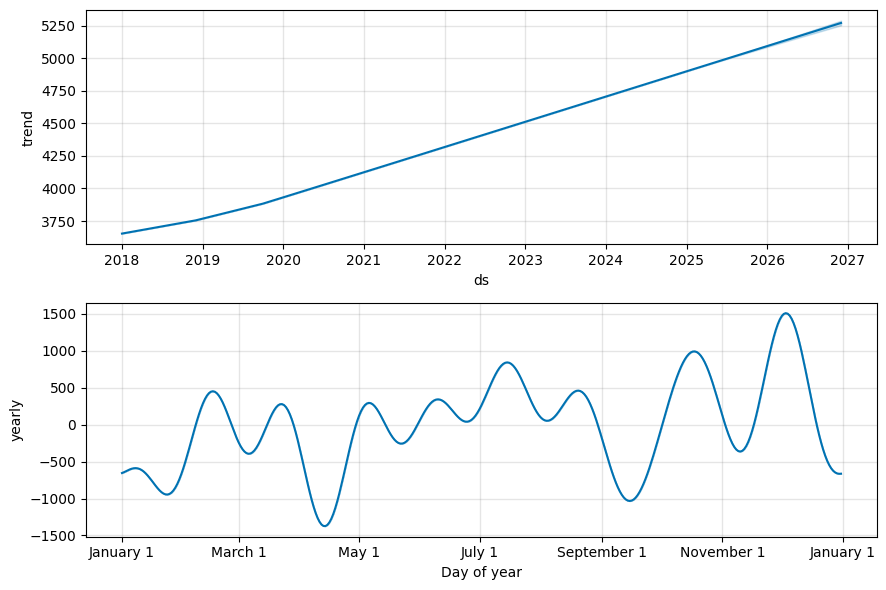

In [ ]:
m.plot_components(forecast);

## Paso 7.3.5 Calculo de los errores

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

data_excel['yhat'] = forecast['yhat']

In [ ]:
data_excel.head()

,ds,y,Mes,Movil3,Movil6,Simple,Holt,Winter,Diferenciada,yhat
0,2018-01-01,2995.0,1,NaN,NaN,2995.000000,3238.026499,3045.736058,NaN,2996.669166
1,2018-02-01,3202.0,2,NaN,NaN,2995.000000,3236.397837,3068.189706,207.0,3048.584261
2,2018-03-01,3550.0,3,3249.000000,NaN,3029.395698,3255.124242,3449.401621,348.0,3448.318863
3,2018-04-01,3409.0,4,3387.000000,NaN,3115.900761,3309.408189,3433.188475,-141.0,3383.361124
4,2018-05-01,3786.0,5,3581.666667,NaN,3164.602949,3345.301419,3850.229695,377.0,3791.683291


In [ ]:
data_excel.tail()

,ds,y,Mes,Movil3,Movil6,Simple,Holt,Winter,Diferenciada,yhat
79,2024-08-01,4898.0,8,4933.333333,4773.833333,4714.131975,4797.878145,4917.347072,-65.0,4909.628431
80,2024-09-01,4598.0,9,4819.666667,4768.666667,4744.683999,4824.302947,4676.187575,-300.0,4621.569074
81,2024-10-01,4737.0,10,4744.333333,4838.666667,4720.310577,4816.126707,4774.151376,139.0,4826.544943
82,2024-11-01,5130.0,11,4821.666667,4877.500000,4723.083738,4821.770688,4948.143300,393.0,4961.116565
83,2024-12-01,6370.0,12,5412.333333,5116.000000,4790.698079,4868.864440,6353.773380,1240.0,6361.780629


In [ ]:
# Calcular errores
mae = mean_absolute_error(data_excel['y'], data_excel['yhat'])
mse = mean_squared_error(data_excel['y'], data_excel['yhat'])
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(data_excel['y'], data_excel['yhat'])

# Crear tabla
tabla_errores = pd.DataFrame({
    'Error': ['MAE', 'MSE', 'RMSE', 'MAPE'],
    'Valor': [mae, mse, rmse, mape]
})

display(Markdown("### Tabla de los errores Método Prophet"))
tabla_errores

### Tabla de los errores Método Prophet

,Error,Valor
0,MAE,62.319422
1,MSE,5834.397733
2,RMSE,76.383229
3,MAPE,0.015101


## Paso 7.3.6 Exportar Resultados


In [ ]:
# Unir valores reales y pronóstico
resultado = pd.merge(data_excel, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds',how='right')

# Define la ruta donde quieres guardar el archivo en tu Drive
#ruta_salida = "/content/drive/MyDrive/Pronósticos 1 - 2025/Pronósticos Martes/pronosticos_resultados.xlsx"

# Exportar
resultado.to_excel("pronosticos_resultados.xlsx", index=False)